In [ ]:
#q5
u=0.00001
for i in range (2000000):
  a=1/(-27.02-u)+1/(4.10-u)+1/(6.41-u)+1/(6.91-u)+1/(7.08-u)+1/(7.53-u)+1/(8.1-u)
  u=u+0.00001
  if(a>-0.0001 and a<0.0001):
    print("Number of iteration: ", i)
    break
print("u is: ", u)


Number of iteration:  460329
u is:  4.603309999994897


In [ ]:
a=10//3
a

3

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

digits = load_digits()

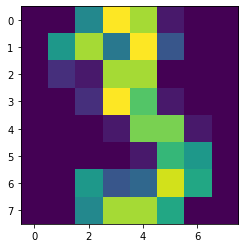

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

plt.imshow(digits.images[3])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.30, random_state=42)

In [ ]:
import numpy as np

print(X_train[:,1])
grades = np.array([[93,  95],[84, 100], [99,  87]])
print(grades[0:3, 1])

[0. 0. 0. ... 0. 0. 0.]
[ 95 100  87]


In [ ]:
classes = sorted(list(y_train))


https://github.com/Suji04/ML_from_Scratch/blob/master/naive%20bayes.ipynb

In [5]:
def calculate_prior():
    classes = sorted(list(y_train))
    count = [0,0,0,0,0,0,0,0,0,0]
    prior = [0,0,0,0,0,0,0,0,0,0]
    for i in classes:
        count[i]+=1
    for i in range( len(count)):
      prior[i]=count[i]/len(y_train)

    return prior

In [4]:
prior=calculate_prior()
prior

NameError: ignored

In [ ]:
for x in X_test:


SyntaxError: ignored

In [6]:
from sklearn.metrics.pairwise import rbf_kernel
def calculate_likelihood_rbf(X_tr, x_unknown, target, Y_tr,h):
    X_tr_tmp=[]
    j=0
    for i in range(len(X_tr)):
      if Y_tr[i]==target:
        X_tr_tmp.append(X_tr[i])
        
    mean= np.mean(X_tr_tmp)
    p_x_given_y =  np.exp(-((x_unknown-mean)**2 / ( 2*h )))
    return p_x_given_y

In [7]:
def naive_bayes_rbf(X_train, X_test, Y):
    # get feature names
    num_features = X_train.shape[1]
    num_labels = 10 #10 digits
    
    
    # calculate prior
    prior = calculate_prior()

    Y_pred = []
    # loop over every data sample
    for x in X_test:
        # calculate likelihood
        
        likelihood = [1]*num_labels
        for j in range(num_labels):
            for i in range(num_features):
                likelihood[j] *= calculate_likelihood_rbf(X_train[:,i], x[i], j, Y)

        # calculate posterior probability (numerator only)
        post_prob = [1]*num_labels
        for j in range(num_labels):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)

In [ ]:
l1 = naive_bayes_rbf(X_train, X_test,y_train)
l1

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 4, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 2, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 5, 4, 5, 2, 4, 5,
       7, 0, 7, 9, 9, 9, 5, 7, 7, 0, 4, 5, 9, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 9, 2, 9, 0, 4, 7, 1, 3, 5, 3, 1, 8, 5, 1, 4, 2,
       7, 7, 4, 4, 1, 9, 8, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 8, 6, 5, 7, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 3, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 9, 9, 2, 4, 7, 6, 5, 1, 5,
       5, 1, 0, 2, 8, 8, 7, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 9, 8, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       9, 9, 9, 8, 5, 3, 3, 1, 0, 5, 8, 3, 4, 0, 2,

In [ ]:
print(y_test)

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 3 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 5 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 5 6 3 0 7 1 1 9 6 1 1
 0 0 2 9 3 9 9 3 7 7 1 3 

In [ ]:


from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_test, l1))
print(f1_score(y_test, l1,average='macro'))

[[52  0  0  0  0  1  0  0  0  0]
 [ 2 35  6  0  0  0  0  0  4  3]
 [ 0  1 43  1  0  0  0  0  2  0]
 [ 0  0  0 48  0  0  0  1  4  1]
 [ 0  3  0  0 55  0  0  2  0  0]
 [ 0  0  0  0  1 52  1  0  0 12]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  3  0  0  0  1  0  0 38  1]
 [ 0  1  0  1  1  1  0  3  1 51]]
0.8876690421055871


In [ ]:
l1

NameError: ignored

In [8]:

def calculate_likelihood_hypercube_kernel(X_tr, x_unknown, target, Y_tr,h):
    X_tr_tmp=[]
    j=0
    for i in range(len(X_tr)):
      if Y_tr[i]==target:
        X_tr_tmp.append(X_tr[i])
        
    mean= np.mean(X_tr_tmp)
    dis=np.abs(x_unknown-mean)/h
    if dis<2:
      p_x_given_y=1
    else:
      p_x_given_y=0
    return p_x_given_y

In [9]:
def naive_bayes_flat_hypercube(X_train, X_test, Y):
    # get feature names
    num_features = X_train.shape[1]
    num_labels = 10 #10 digits
    
    
    # calculate prior
    prior = calculate_prior()

    Y_pred = []
    # loop over every data sample
    for x in X_test:
        # calculate likelihood
        
        likelihood = [1]*num_labels
        for j in range(num_labels):
            for i in range(num_features):
              if kernel= ="flat":
                likelihood[j] += calculate_likelihood_hypercube_kernel(X_train[:,i], x[i], j, Y)
            likelihood[j]=likelihood[j]/(num_features*4)
        # calculate posterior probability (numerator only)
        post_prob = [1]*num_labels
        for j in range(num_labels):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)

SyntaxError: ignored

In [ ]:
l2 = naive_bayes_flat_hypercube(X_train, X_test,y_train)
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_test, l2))
print(f1_score(y_test, l2,average='macro'))

[[39  2  0  0  3  0  8  0  0  1]
 [ 0 20  0  1  6  0 17  0  4  2]
 [ 0 10  7  7  1  0  8  0 14  0]
 [ 1 11  0 12  2  0 12  0 12  4]
 [ 1  3  0  0 39  0 15  1  1  0]
 [ 2  9  0  7  4  4 18  2 14  6]
 [ 0  0  0  0  1  0 50  0  2  0]
 [ 2  7  0  5  6  0  9 22  4  0]
 [ 2 13  2  5  0  0  2  0 19  0]
 [ 5  7  1  7  3  0  8  2 11 15]]
0.39625497194083337


In [ ]:
l3 = naive_bayes_flat_hypercube(X_train, X_test,y_train)
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_test, l3))
print(f1_score(y_test, l3,average='macro'))

[[49  0  0  0  0  0  0  0  4  0]
 [ 0 36  8  1  0  0  0  0  2  3]
 [ 0  1 43  1  0  0  0  0  2  0]
 [ 0  1  0 49  0  0  0  0  4  0]
 [ 1 11  0  0 37  0  1  0 10  0]
 [ 0  6  2 12  1  5  3  0 27 10]
 [ 1  0  0  0  0  0 49  0  3  0]
 [ 0  3  2  0  0  0  0 44  6  0]
 [ 0  3  0  1  0  0  0  0 39  0]
 [ 0  3  0 38  1  0  0  0  9  8]]
0.6470455964342072


In [ ]:
print(f1_score(y_test, l3,average='macro'))

0.44490368534465147


In [12]:
#7(a)
import numpy as np
def naive_bayes_classifier(X_train, X_test, Y,h, kernel):
    # get feature names
    num_features = X_train.shape[1]
    num_labels = 10 #10 digits
    
    
    # calculate prior
    prior = calculate_prior()

    Y_pred = []
    # loop over every data sample
    for x in X_test:
        # calculate likelihood
        
        likelihood = [1]*num_labels
        for j in range(num_labels):
            for i in range(num_features):
              if kernel =="flat":
                likelihood[j] += calculate_likelihood_hypercube_kernel(X_train[:,i], x[i], j, Y,h)
              else:
                likelihood[j] *= calculate_likelihood_rbf(X_train[:,i], x[i], j, Y,h)
            likelihood[j]=likelihood[j]/(num_features*4)
        # calculate posterior probability (numerator only)
        post_prob = [1]*num_labels
        for j in range(num_labels):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)

In [ ]:
#7(b)
h=1
result_flat= naive_bayes_classifier(X_train, X_test,y_train,h,"flat")
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n ",confusion_matrix(y_test, result_flat))
print("\n Accuracy F1 score(flat): \n", f1_score(y_test, result_flat,average='macro'))
result_rbf= naive_bayes_classifier(X_train, X_test,y_train,h,"rbf")
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n", confusion_matrix(y_test, result_rbf))
print("\n Accuracy F1 score(rbf): \n", f1_score(y_test, result_rbf,average='macro'))


Confution Matrix for flat kernel: 
  [[54  0  0  0 27  0  1  7  0  0]
 [ 0 35  0  0 40  0  2 13  0  0]
 [ 0 34  0  0 21  0  2 35  0  0]
 [ 0 14  0  3 11  0  3 62  0  0]
 [ 0  0  0  0 72  0  0  4  0  0]
 [ 1  2  0  0 41  2  8 54  0  0]
 [ 0  1  0  0 30  0 57  1  0  0]
 [ 0  0  0  0 11  0  0 67  0  0]
 [ 0 13  0  0 21  0  1 57  0  0]
 [ 3  3  0  0 24  0  3 59  0  0]]

 Accuracy F1 score(flat): 
 0.25765507287741196
Confution Matrix for flat kernel: 
 [[89  0  0  0  0  0  0  0  0  0]
 [ 7 61  4  0  0  0  5  0  4  9]
 [ 3  3 78  5  0  0  0  2  0  1]
 [ 0  0  2 76  0  1  0  2  4  8]
 [ 1  2  0  0 69  0  0  3  1  0]
 [ 0  0  0  1  1 92  1  0  0 13]
 [ 1  2  0  0  0  0 86  0  0  0]
 [ 4  0  0  0  0  0  0 74  0  0]
 [ 1  8  0  0  0  1  1  2 66 13]
 [ 1  0  0  4  0  3  0  3  0 81]]

 Accuracy F1 score(rbf): 
 0.8605852036864577


Best Params: kernel  h : f1_score :  flat 1 0.5641370478490372
Best Params: kernel  h : f1_score :  rbf 1 0.8911793097227971
Best Params: kernel  h : f1_score :  flat 2 0.7328386836233833
Best Params: kernel  h : f1_score :  rbf 2 0.9007635987297004
Best Params: kernel  h : f1_score :  flat 3 0.7549128418210197
Best Params: kernel  h : f1_score :  rbf 3 0.9007635987297004
Best Params: kernel  h : f1_score :  flat 4 0.664915251271593
Best Params: kernel  h : f1_score :  rbf 4 0.9007635987297004
Best Params: kernel  h : f1_score :  flat 5 0.5284206027890238
Best Params: kernel  h : f1_score :  rbf 5 0.9007635987297004
Best Params: kernel  h : f1_score :  flat 6 0.26552042112416496
Best Params: kernel  h : f1_score :  rbf 6 0.9007635987297004


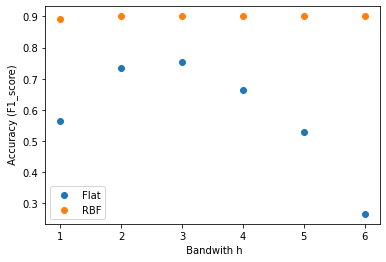

In [ ]:
#problem 7(c)
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
def gridSearch():

# Bandwidth  
  h = [ 1,2,3,4,5,6]
  kernel =["flat","rbf"]  
  parameters =[]
  f1_score_flat=[] 
  f1_score_rbf=[]  
  for i in h:        
    for j in kernel:            
      parameters.append( ( i, j ) )
              
    #print("Available combinations : ",  parameters )
              
    # Applying linear searching in list of available combination
    # to achieved maximum accuracy on CV set
      
  for k in range( len( parameters ) ): 
    result= naive_bayes_classifier(X_train2, X_val,y_train2,parameters[k][0],parameters[k][1])
    if parameters[k][1]=="flat":
      f1_score_flat.append(f1_score(y_val, result,average='macro'))
    else:
      f1_score_rbf.append(f1_score(y_val, result,average='macro'))

    print("Best Params: kernel  h : f1_score : ",parameters[k][1],parameters[k][0], f1_score(y_val, result,average='macro'))
    
  plt.xlabel(" Bandwith h")
  plt.ylabel(" Accuracy (F1_score)")  
  plt.scatter(h,f1_score_flat, label="Flat")
  plt.scatter(h,f1_score_rbf, label="RBF") 
  plt.legend()    
gridSearch()

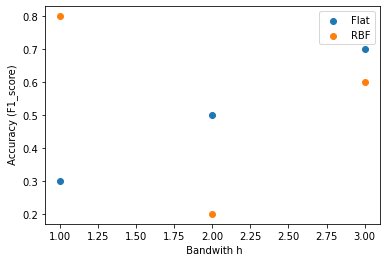

In [ ]:
import matplotlib.pyplot as plt

f1_score_rbf=[0.8,.2, 0.6]
h=[1,2,3]
f1_score_flat=[0.3,.5, 0.7]


plt.xlabel(" Bandwith h")
plt.ylabel(" Accuracy (F1_score)")  
plt.scatter(h,f1_score_flat, label="Flat")
plt.scatter(h,f1_score_rbf, label="RBF") 
plt.legend()

In [15]:
#7(d)
h=2 #best h in gridsearch 
result_flat= naive_bayes_classifier(X_train, X_test,y_train,h,"flat")
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n ",confusion_matrix(y_test, result_flat))
print("\n Accuracy F1 score(flat): \n", f1_score(y_test, result_flat,average='macro'))
result_rbf= naive_bayes_classifier(X_train, X_test,y_train,h,"rbf")
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n", confusion_matrix(y_test, result_rbf))
print("\n Accuracy F1 score(rbf): \n", f1_score(y_test, result_rbf,average='macro'))

Confution Matrix for flat kernel: 
  [[49  0  0  0  1  0  2  0  1  0]
 [ 0 40  1  1  0  0  2  0  5  1]
 [ 0  4 38  1  0  0  1  0  3  0]
 [ 0  3  0 46  0  0  0  0  4  1]
 [ 2  9  0  0 44  0  1  4  0  0]
 [ 5  2  3 13  1 26  2  0 10  4]
 [ 1  0  0  0  0  0 51  0  1  0]
 [ 1  3  0  1  0  1  0 44  5  0]
 [ 0  4  1  3  0  1  1  0 32  1]
 [ 1  2  2 19  0  0  0  2  6 27]]

 Accuracy F1 score(flat): 
 0.7338107924016455
Confution Matrix for flat kernel: 
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 35  7  0  0  0  0  0  4  4]
 [ 0  1 43  1  0  0  0  0  2  0]
 [ 0  0  0 48  0  0  0  1  4  1]
 [ 0  3  0  0 55  0  0  2  0  0]
 [ 0  0  0  0  1 52  1  0  0 12]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  3  0  0  0  1  0  0 38  1]
 [ 0  1  0  1  1  1  0  3  1 51]]

 Accuracy F1 score(rbf): 
 0.889591677805013


In [17]:
#7(e)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n", confusion_matrix(y_test, y_pred))
print("\n Accuracy F1 score(rbf): \n", f1_score(y_test, y_pred,average='macro'))

Confution Matrix for flat kernel: 
 [[52  0  0  0  0  0  0  1  0  0]
 [ 0 37  2  0  0  0  0  2  6  3]
 [ 0  3 31  0  0  0  1  0 12  0]
 [ 0  0  2 41  0  0  1  0  8  2]
 [ 0  0  0  0 51  0  2  7  0  0]
 [ 0  0  0  1  0 62  1  2  0  0]
 [ 0  0  0  0  1  1 51  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  2  0  0  0  0  0  2 39  0]
 [ 0  1  1  1  0  2  1  7  4 42]]

 Accuracy F1 score(rbf): 
 0.8475555476524305


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train,y_train)
print(nbModel_grid.best_estimator_)
y_pred=nbModel_grid.predict(X_test)
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n", confusion_matrix(y_test, y_pred))
print("\n Accuracy F1 score(rbf): \n", f1_score(y_test, y_pred,average='macro'))


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 926 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.2s finished


GaussianNB(priors=None, var_smoothing=0.08111308307896872)
Confution Matrix for flat kernel: 
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 36  5  0  0  0  0  0  6  3]
 [ 0  1 44  0  0  0  0  0  2  0]
 [ 0  0  1 46  0  0  0  1  4  2]
 [ 0  0  0  0 59  0  0  1  0  0]
 [ 0  0  0  0  1 58  1  0  0  6]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0  0  2  0  1  0  4  1 51]]

 Accuracy F1 score(rbf): 
 0.9103667313379301

 Accuracy F1 score(rbf): 
 0.912962962962963


In [41]:
import random
a=random.random()*4
a

0.7709310605856441

In [48]:
#7(f) class specific h
import numpy as np

def naive_bayes_classifier(X_train, X_test, Y, kernel,h):
    # get feature names
    num_features = X_train.shape[1]
    num_labels = 10 #10 digits
    
    
    # calculate prior
    prior = calculate_prior()

    Y_pred = []
    # loop over every data sample
    for x in X_test:
        # calculate likelihood
        
        likelihood = [1]*num_labels
        for j in range(num_labels):
            for i in range(num_features):
              if kernel =="flat":
                likelihood[j] += calculate_likelihood_hypercube_kernel(X_train[:,i], x[i], j, Y,h[j])
              else:
                likelihood[j] *= calculate_likelihood_rbf(X_train[:,i], x[i], j, Y,h[j])
            likelihood[j]=likelihood[j]/(num_features*4)
        # calculate posterior probability (numerator only)
        post_prob = [1]*num_labels
        for j in range(num_labels):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)

In [49]:
import random
h=[]
for i in range(10):
  h.append(random.random()*2)
result_flat= naive_bayes_classifier(X_train, X_test,y_train,"flat", h)
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n ",confusion_matrix(y_test, result_flat))
print("\n Accuracy F1 score(flat): \n", f1_score(y_test, result_flat,average='macro'))
result_rbf= naive_bayes_classifier(X_train, X_test,y_train,"rbf",h )
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n", confusion_matrix(y_test, result_rbf))
print("\n Accuracy F1 score(rbf): \n", f1_score(y_test, result_rbf,average='macro'))

Confution Matrix for flat kernel: 
  [[53  0  0  0  0  0  0  0  0  0]
 [ 5  3 31  0  0  0  1  0  1  9]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 8  0 30  0  0  0  0  0  0 16]
 [42  1  2  0  8  0  7  0  0  0]
 [27  1 26  0  0  0  1  0  0 11]
 [24  0  0  0  0  0 29  0  0  0]
 [15  0 22  0  0  0  0  9  1  8]
 [13  1 16  0  0  0  0  0  4  9]
 [11  0  6  0  0  0  0  0  0 42]]

 Accuracy F1 score(flat): 
 0.2806177137001219
Confution Matrix for flat kernel: 
 [[53  0  0  0  0  0  0  0  0  0]
 [ 1 13 19  0  0  0  0  0  6 11]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  5  1  0  0  0  0  1 47]
 [15  0  0  0 40  0  0  0  0  5]
 [ 5  0  1  0  0 33  1  0  0 26]
 [ 8  0  0  0  0  0 45  0  0  0]
 [ 0  0  7  0  0  0  0 38  0 10]
 [ 1  0  6  0  0  1  0  0 20 15]
 [ 0  0  0  0  0  0  0  0  0 59]]

 Accuracy F1 score(rbf): 
 0.6206939497139066


In [50]:
import random
h=[]
for i in range(10):
  h.append(random.random()*5)
result_flat= naive_bayes_classifier(X_train, X_test,y_train,"flat", h)
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n ",confusion_matrix(y_test, result_flat))
print("\n Accuracy F1 score(flat): \n", f1_score(y_test, result_flat,average='macro'))
result_rbf= naive_bayes_classifier(X_train, X_test,y_train,"rbf",h )
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n", confusion_matrix(y_test, result_rbf))
print("\n Accuracy F1 score(rbf): \n", f1_score(y_test, result_rbf,average='macro'))

Confution Matrix for flat kernel: 
  [[53  0  0  0  0  0  0  0  0  0]
 [ 3  5  0  0  0 12  3  0  0 27]
 [ 3  0  0  0  0  4  1  0  0 39]
 [ 0  0  0 12  0  0  0  0  0 42]
 [13  0  0  0 32  1  1  0  0 13]
 [ 2  0  0  0  0 34  1  0  0 29]
 [ 3  0  0  0  0  0 49  0  0  1]
 [ 3  0  0  0  0  5  0  0  0 47]
 [ 5  0  0  0  0  3  1  0  0 34]
 [ 1  0  0  0  0  0  0  0  0 58]]

 Accuracy F1 score(flat): 
 0.3779157439728184
Confution Matrix for flat kernel: 
 [[52  0  0  0  0  1  0  0  0  0]
 [ 0 14  0  0  0 12  0  0  0 24]
 [ 0  0  1  0  0 10  0  0  0 36]
 [ 0  0  0 18  0  0  0  0  0 36]
 [ 2  0  0  0 50  3  0  0  0  5]
 [ 0  0  0  0  0 51  0  0  0 15]
 [ 2  0  0  0  0  0 50  0  0  1]
 [ 0  0  0  0  0  8  0  0  0 47]
 [ 0  0  0  0  0 12  0  0  0 31]
 [ 0  0  0  0  0  2  0  0  0 57]]

 Accuracy F1 score(rbf): 
 0.4798001106244681


In [54]:
import random
h=[random.randrange(1, 7) for _ in range(10)]
h

[1, 2, 4, 3, 3, 1, 1, 3, 5, 3]

In [56]:

import random
h=[random.randrange(1, 7) for _ in range(10)]
result_flat= naive_bayes_classifier(X_train, X_test,y_train,"flat", h)
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n ",confusion_matrix(y_test, result_flat))
print("\n Accuracy F1 score(flat): \n", f1_score(y_test, result_flat,average='macro'))
result_rbf= naive_bayes_classifier(X_train, X_test,y_train,"rbf",h )
from sklearn.metrics import confusion_matrix, f1_score
print("Confution Matrix for flat kernel: \n", confusion_matrix(y_test, result_rbf))
print("\n Accuracy F1 score(rbf): \n", f1_score(y_test, result_rbf,average='macro'))

Confution Matrix for flat kernel: 
  [[47  1  0  3  0  1  1  0  0  0]
 [ 0 45  0  5  0  0  0  0  0  0]
 [ 0 11 32  4  0  0  0  0  0  0]
 [ 0  4  0 50  0  0  0  0  0  0]
 [ 0 52  0  0  2  4  2  0  0  0]
 [ 0 12  0 20  0 33  1  0  0  0]
 [ 0  3  0  0  0  1 49  0  0  0]
 [ 0 45  0  5  0  5  0  0  0  0]
 [ 1 31  0 11  0  0  0  0  0  0]
 [ 0 11  0 45  0  0  0  0  0  3]]

 Accuracy F1 score(flat): 
 0.42738751307602535
Confution Matrix for flat kernel: 
 [[51  0  0  0  0  2  0  0  0  0]
 [ 0 40  0  0  0  7  0  0  0  3]
 [ 0  3 40  3  0  1  0  0  0  0]
 [ 0  1  0 51  0  2  0  0  0  0]
 [ 0 13  0  0 31 16  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  2 51  0  0  0]
 [ 0  4  0  1  0 49  0  1  0  0]
 [ 0 11  0  6  0 20  0  0  5  1]
 [ 0  1  0  7  0 12  0  0  0 39]]

 Accuracy F1 score(rbf): 
 0.6587388705668038


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
def gridSearch():

# Bandwidth  
  h = [ 1,2,3,4,5,6]
  kernel =["flat","rbf"]  
  parameters =[]
  f1_score_flat=[] 
  f1_score_rbf=[]  
  for i in h:        
    for j in kernel:            
      parameters.append( ( i, j ) )
              
    #print("Available combinations : ",  parameters )
              
    # Applying linear searching in list of available combination
    # to achieved maximum accuracy on CV set
      
  for k in range( len( parameters ) ): 
    result= naive_bayes_classifier(X_train2, X_val,y_train2,parameters[k][0],parameters[k][1])
    if parameters[k][1]=="flat":
      f1_score_flat.append(f1_score(y_val, result,average='macro'))
    else:
      f1_score_rbf.append(f1_score(y_val, result,average='macro'))

    print("Best Params: kernel  h : f1_score : ",parameters[k][1],parameters[k][0], f1_score(y_val, result,average='macro'))
    
  plt.xlabel(" Bandwith h")
  plt.ylabel(" Accuracy (F1_score)")  
  plt.scatter(h,f1_score_flat, label="Flat")
  plt.scatter(h,f1_score_rbf, label="RBF") 
  plt.legend()    
gridSearch()